In [46]:
import numpy as np
import nltk
import re
from nltk import ngrams
from nltk.tokenize import RegexpTokenizer
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer

In [47]:
nltk.download('punkt');
nltk.download('stopwords');
nltk.download('wordnet');

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Read the Movies Text data**

In [48]:
path="/content/movies_text.txt"
file=open(path,'r')
raw_data=file.read().strip()
print(raw_data[:1000])

@@176501 Either you 're flat or I am . I beg your pardon . Excuse me . Always the lady . Say ... Say , what the ... ? Why , I frighten your hiccup away , Marthy . Yes , you did . And I 'm going to hit you . See here . If you soak me in the eye again I 'm gon na quit you . - You get me ? - No . Only on the back this time , Marthy . I get you . - Well , I think you lose them , Marthy . - Yes . Yes , I did . Oh , I got it . Ten ... Ten swallows of this without breathing and ... sure cure . One , two , three , four , five 10 . Maybe I got hiccup too , Marthy . See ? I told you . It 's a sure cure , never fails . I think we got to go to Johnny the Harp for get some more whiskey . Yeah , well . Right you are , I 'm bone dry . Wait , I 'll get my bonnet . @ @ @ @ @ @ @ @ @ @ me together once more . Hold that , will you ? You 're not sorry you took me back , are you ? Oh , no , Marthy . I 'm darn glad I found you in Norfolk . Aye , you been too old to go walking streets , Marthy . Old ! But yo

# **Punctuation Removal**

In [49]:
data=re.split('[.]',raw_data)[:20000]

#punctutation removal
data=[re.sub(r"[^a-zA-Z'!]+", ' ', i.lower()) for i in data if len(i)>2]
print(data[:10])

[" either you 're flat or i am ", ' i beg your pardon ', ' excuse me ', ' always the lady ', ' say ', ' say what the ', ' why i frighten your hiccup away marthy ', ' yes you did ', " and i 'm going to hit you ", ' see here ']


In [50]:
CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

In [51]:
def expand(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                   flags=re.IGNORECASE|re.DOTALL)
    patern=re.findall(contractions_pattern,text)
    for i in patern:
        text=text.replace(i,contraction_mapping[i.lower()])
    return text

# **Expand the contracted of words**


In [52]:

for i in range(len(data)):
    data[i]=expand(data[i].replace(" '","'"))

#sentences 
dataexpand=data
print(dataexpand[:20])


[' either you are flat or i am ', ' i beg your pardon ', ' excuse me ', ' always the lady ', ' say ', ' say what the ', ' why i frighten your hiccup away marthy ', ' yes you did ', ' and i am going to hit you ', ' see here ', ' if you soak me in the eye again i am gon na quit you ', ' you get me no ', ' only on the back this time marthy ', ' i get you ', ' well i think you lose them marthy ', ' yes ', ' yes i did ', ' oh i got it ', ' ten ', ' ten swallows of this without breathing and ']


# **Tokenization**

In [53]:

tokenised_data=[]
for i in dataexpand:
  token= word_tokenize(str(i))
  tokenised_data.append(token)
print(tokenised_data[:10])

[['either', 'you', 'are', 'flat', 'or', 'i', 'am'], ['i', 'beg', 'your', 'pardon'], ['excuse', 'me'], ['always', 'the', 'lady'], ['say'], ['say', 'what', 'the'], ['why', 'i', 'frighten', 'your', 'hiccup', 'away', 'marthy'], ['yes', 'you', 'did'], ['and', 'i', 'am', 'going', 'to', 'hit', 'you'], ['see', 'here']]


# **Stop Word Removal**

In [54]:
stop_words = set(stopwords.words('english')) 


In [55]:
stop_removed_data=[]
for tokens in tokenised_data:
  stop_remove = [w for w in tokens if not w in stop_words] 
  stop_removed_data.append(stop_remove)
print( stop_removed_data[:50]) 

[['either', 'flat'], ['beg', 'pardon'], ['excuse'], ['always', 'lady'], ['say'], ['say'], ['frighten', 'hiccup', 'away', 'marthy'], ['yes'], ['going', 'hit'], ['see'], ['soak', 'eye', 'gon', 'na', 'quit'], ['get'], ['back', 'time', 'marthy'], ['get'], ['well', 'think', 'lose', 'marthy'], ['yes'], ['yes'], ['oh', 'got'], ['ten'], ['ten', 'swallows', 'without', 'breathing'], ['sure', 'cure'], ['one', 'two', 'three', 'four', 'five'], ['maybe', 'got', 'hiccup', 'marthy'], ['see', 'told'], ['sure', 'cure', 'never', 'fails'], ['think', 'got', 'go', 'johnny', 'harp', 'get', 'whiskey'], ['yeah', 'well'], ['right', 'bone', 'dry'], ['wait', 'get', 'bonnet'], ['together'], ['hold', 'sorry', 'took', 'back', 'oh', 'marthy'], ['darn', 'glad', 'found', 'norfolk'], ['aye', 'old', 'go', 'walking', 'streets', 'marthy'], ['old', '!', 'better', 'stay', 'old', 'chris', 'barge'], ['well', 'glad', 'found'], ['honest'], ['yeah', 'glad', 'dump'], ['good', 'old', 'punk'], ['come'], ['yeah'], ['marthy'], ['going

# **Lemmatization**

In [56]:
lemmatizer = WordNetLemmatizer() 
# a denotes adjective in "pos"
lemmatised_data=[] 
for words in stop_removed_data:
  lemma_data=[lemmatizer.lemmatize(word, pos ="a") for word in words]
  lemmatised_data.append(lemma_data)

print(lemmatised_data[:50])

[['either', 'flat'], ['beg', 'pardon'], ['excuse'], ['always', 'lady'], ['say'], ['say'], ['frighten', 'hiccup', 'away', 'marthy'], ['yes'], ['going', 'hit'], ['see'], ['soak', 'eye', 'gon', 'na', 'quit'], ['get'], ['back', 'time', 'marthy'], ['get'], ['well', 'think', 'lose', 'marthy'], ['yes'], ['yes'], ['oh', 'got'], ['ten'], ['ten', 'swallows', 'without', 'breathing'], ['sure', 'cure'], ['one', 'two', 'three', 'four', 'five'], ['maybe', 'got', 'hiccup', 'marthy'], ['see', 'told'], ['sure', 'cure', 'never', 'fails'], ['think', 'got', 'go', 'johnny', 'harp', 'get', 'whiskey'], ['yeah', 'well'], ['right', 'bone', 'dry'], ['wait', 'get', 'bonnet'], ['together'], ['hold', 'sorry', 'took', 'back', 'oh', 'marthy'], ['darn', 'glad', 'found', 'norfolk'], ['aye', 'old', 'go', 'walking', 'streets', 'marthy'], ['old', '!', 'good', 'stay', 'old', 'chris', 'barge'], ['well', 'glad', 'found'], ['honest'], ['yeah', 'glad', 'dump'], ['good', 'old', 'punk'], ['come'], ['yeah'], ['marthy'], ['going',

# **Term statstics**


In [57]:

n_grams=[]
n=[2,3,4]

for n_g in n:
  gram=[]
  for words in lemmatised_data:
    if len(words)>1:
      sentence=" ".join(words)
      gram.extend(ngrams(sentence.split(), n_g))
  n_grams.append(gram)

print("two gram generation")
print(n_grams[0][:10])
print(" \n three gram_generation")
print(n_grams[1][:10])
print("\n 4 gram generation")
print(n_grams[2][:10])



two gram generation
[('either', 'flat'), ('beg', 'pardon'), ('always', 'lady'), ('frighten', 'hiccup'), ('hiccup', 'away'), ('away', 'marthy'), ('going', 'hit'), ('soak', 'eye'), ('eye', 'gon'), ('gon', 'na')]
 
 three gram_generation
[('frighten', 'hiccup', 'away'), ('hiccup', 'away', 'marthy'), ('soak', 'eye', 'gon'), ('eye', 'gon', 'na'), ('gon', 'na', 'quit'), ('back', 'time', 'marthy'), ('well', 'think', 'lose'), ('think', 'lose', 'marthy'), ('ten', 'swallows', 'without'), ('swallows', 'without', 'breathing')]

 4 gram generation
[('frighten', 'hiccup', 'away', 'marthy'), ('soak', 'eye', 'gon', 'na'), ('eye', 'gon', 'na', 'quit'), ('well', 'think', 'lose', 'marthy'), ('ten', 'swallows', 'without', 'breathing'), ('one', 'two', 'three', 'four'), ('two', 'three', 'four', 'five'), ('maybe', 'got', 'hiccup', 'marthy'), ('sure', 'cure', 'never', 'fails'), ('think', 'got', 'go', 'johnny')]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: generator 'ngrams' raised StopIteration
  # Remove the CWD from sys.path while we load stuff.


# **Zipps Law**

   Word  Frequency
0   you       6207
1     i       5559
2   the       3793
3    is       3325
4    to       3316
5     a       2726
6    it       2573
7     t       2436
8     n       2435
9  that       2101


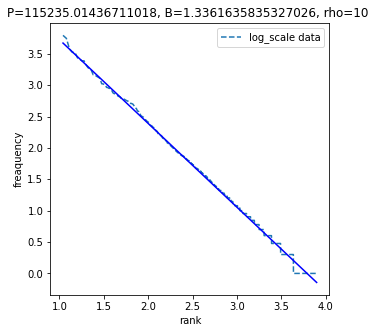

In [58]:
def zipps(sort_dict,rho=0):
    rank,freq=[],[]
    for idx, (_,i) in enumerate(sort_dict): 
        freq.append(np.log10(i))
        rank.append(np.log10(idx+1+rho))
    return rank,freq

def best_fit(x,y):
    x_bar=np.mean(x)
    y_bar=np.mean(y)
    num,den=0,0
    for i ,j in zip(x,y):
        num+=(i-x_bar)*(j-y_bar)
        den+=(i-x_bar)**2
    m=num/den
    c=y_bar-m*x_bar
    return m,c

bag_of_word=[] #bag of word
token = RegexpTokenizer(r'\w+')
for i in dataexpand:
    x=token.tokenize(i)
    bag_of_word.extend(x) 
dict_={} # dictionary with frequecy
unique=np.unique(bag_of_word)
for i in unique:
    dict_[i]=bag_of_word.count(i)
sort_dict = sorted(dict_.items(), key=lambda kv: kv[1],reverse=True)
import pandas as pd
df=pd.DataFrame(sort_dict,columns=['Word', "Frequency"])
print(df.head(10))
rho=10
rank,freq=zipps(sort_dict,rho)
m,c=best_fit(np.array(rank),np.array(freq))

freq_m = [m * i + c for i in rank]
plt.figure(figsize=(5,5))
# Plot the best fit line over the actual values
plt.plot(rank, freq, '--',label="log_scale data")
plt.plot(rank, freq_m, 'b')
plt.xlabel("rank")
plt.ylabel("freaquency")
plt.legend()
plt.title("P={}, B={}, rho={} ".format(10**(c),-m,rho))
plt.show()
        


# **TF-IDF Computation**

In [59]:
def show(dict,max_len=10):
  for k in list(dict.keys())[:max_len]:
    print("{}".format((k,dict[k])),end="  ")

import operator
tokens_final=[token for tokens in tokenised_data for token in tokens]
wordDict = dict.fromkeys(tokens_final, 0)

for word in tokens_final:
    wordDict[word]+=1


sorted_d = dict( sorted(wordDict.items(), key=operator.itemgetter(1),reverse=True))
print('Dictionary in descending order by value : ')
show(sorted_d)

Dictionary in descending order by value : 
('you', 6207)  ('i', 5556)  ('the', 3793)  ('is', 3325)  ('to', 3316)  ('a', 2726)  ('it', 2573)  ("n't", 2431)  ('that', 2101)  ('and', 1897)  

In [60]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

In [61]:
tfBow = computeTF(wordDict, tokens_final)
show(tfBow,20)

('either', 0.00021184346180462384)  ('you', 0.043830412247376674)  ('are', 0.009532955781208073)  ('flat', 4.9430141087745564e-05)  ('or', 0.001369921053003234)  ('i', 0.03923340912621633)  ('am', 0.006461225585041027)  ('beg', 0.00016241332071687827)  ('your', 0.006249382123236403)  ('pardon', 0.0002471507054387278)  ('excuse', 0.0002824579490728318)  ('me', 0.009871905320095471)  ('always', 0.0007343906675893626)  ('the', 0.026784075020831275)  ('lady', 0.00046605561597017243)  ('say', 0.0022102334514949085)  ('what', 0.00854435295945316)  ('why', 0.0026268589263773357)  ('frighten', 3.530724363410397e-05)  ('hiccup', 1.4122897453641588e-05)  

In [62]:
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
  
    for word, val in docList[0].items():
      idfDict[word] = math.log10(N / float(val)+1)
        
    return idfDict

In [63]:
idfs = computeIDF([wordDict])
show(idfs,20)

('either', 0.014240439114610285)  ('you', 6.996286473501412e-05)  ('are', 0.00032158052702446066)  ('flat', 0.05799194697768673)  ('or', 0.0022328814322919565)  ('i', 7.815971980123504e-05)  ('am', 0.0004743796014020706)  ('beg', 0.018483405694013133)  ('your', 0.0004904511892253475)  ('pardon', 0.012234456417011586)  ('excuse', 0.010723865391773066)  ('me', 0.0003105430821650142)  ('always', 0.004155959771157703)  ('the', 0.00011448384985324136)  ('lady', 0.006530867158957755)  ('say', 0.001385310526766417)  ('what', 0.0003587728266021529)  ('why', 0.001165891926790097)  ('frighten', 0.07918124604762482)  ('hiccup', 0.17609125905568124)  

In [64]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [65]:
tfidfBow = computeTFIDF(tfBow, idfs)
show(tfidfBow,20)

('either', 3.016743919657015e-06)  ('you', 3.0665012033431208e-06)  ('are', 3.0656129442217713e-06)  ('flat', 2.8665501210601152e-06)  ('or', 3.0588712829567663e-06)  ('i', 3.066472264152286e-06)  ('am', 3.0650736176006226e-06)  ('beg', 3.001951296921929e-06)  ('your', 3.065016894264921e-06)  ('pardon', 3.0237545341237835e-06)  ('excuse', 3.02904102469334e-06)  ('me', 3.0656519049436487e-06)  ('always', 3.05209807081504e-06)  ('the', 3.0663440231428003e-06)  ('lady', 3.0437473165874265e-06)  ('say', 3.061859666967168e-06)  ('what', 3.065481662749481e-06)  ('why', 3.0626336150798373e-06)  ('frighten', 2.795671545455422e-06)  ('hiccup', 2.486918794126022e-06)  